# 拉勾网数据分析师岗分析

## 前言

    大数据概念越来越火爆，很多学生开始学习大数据，社会人士也蠢蠢欲动准备转行，笔者经过深思熟虑，也决心动身转行，赶上大数据的热潮。经历了几个月的坎坷的数据分析学习过程，或多或少学习了一些内容，因此准备小试牛刀，以此项目练手，回顾和复习下python相关知识点，同时为以后的学习、工作奠定基础。
   
    操作环境：python 3.6
   
    工具选取：数据分析部分主要使用pandas作为数据整理和统计分析的工具，matplotlib用于图形的可视化，seaborn库包用于图形美化。在进行技能需求分析的时候，使用了jieba作为分词工具包，并使用wordcloud包制作词云。

## 一、案例选取

    虽然十分想要转行数据分析，但是面对一个未知的领域仍然十分恐慌，因此需要对这一岗位进行深入了解。不过既然学习了数据分析，就要用数据来“说话”，最真实直观又容易获取的数据当然就是招聘网站上企业发布的招聘信息啦。
   
    本次案例即是选取拉勾网数据分析师职位信息进行爬取，通过数据分析的手段来对这一职位进行多层次剖析。

## 二、分析目的

   希望能够通过这次分析获取数据分析师岗位的深层信息，对数据分析师有一个全方位的了解，具体从以下几个方向展开分析：

   1. 数据分析师岗位需求的地域性分布；
   2. 数据分析行业整体薪酬情况；
   3. 不同城市数据分析师薪资情况；
   4. 不同工作经验需求量是怎样的？
   5. 工作经验的不同，薪资是怎样变化的？
   6. 数据分析对从业者的学历要求；
   7. 不同学历对薪资水平的影响情况；
   8. 数据分析师岗位福利待遇是怎样的？
   9. 招聘企业对应聘者的技能要求情况。

## 三、数据来源

    本项目全部数据集来源于拉勾网，由于目前爬虫功力尚有些欠缺，因此暂时借助于集搜客这一网络工具从拉钩网爬取数据挖掘频道下前30页的招聘职位，企业名称，职能要求等相关数据。                                                                     
    之所以选择拉勾网是因为它专注于互联网行业的招聘信息，笔者目前亦准备进入互联网行业，而且岗位信息数据相对完整，极少存在信息的缺漏，极大的减少了数据清理工作。         
    本次爬取数据的关键信息如下：
                                

| 内容    | 字段        |
|:---------- |:------     |
|岗位名称 |positionName      |
|月薪     |monthSalary|
|公司名称  |companyName   |
|所属行业  |industry    |
|公司规模  |companySize       |
|融资阶段  |developmentPhase       |
|投资人    |investors   |
|所属城市  |city        |
|经验要求  |experience  |
|学历要求  |qualification|
|全职/兼职 |full_or_part|
|任职要求|positionRequirement|
|岗位标签|positionLables|
|职位优势|positionAdvantage|

                                
                                 


## 四、数据整理

### 导入数据

In [1]:
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
from pylab import mpl
import matplotlib.pyplot as plt
import seaborn as sns
import jieba.analyse
from wordcloud import WordCloud
from matplotlib import font_manager as fm
from matplotlib import cm
from os import path
import random
% matplotlib inline
plt.style.use('ggplot')

#导入数据
lagou_data=pd.read_excel('C:/Users/Administrator/DataScraperWorks/lagou_data.xlsx')
lagou_data.head()#print,查看原始数据

,_clueid,_fullpath,_realpath,_theme,_middle,saveTime,_pageno,_actionno,_actionvalue,_prestamp,...,city,positionName,companyName,experience,education,full_or_part,positionLables,postionAdvantage,positionRequirement,container_item_no
0,5944487,https://www.lagou.com/jobs/3101514.html,https://www.lagou.com/jobs/3101514.html,拉勾网第二层,规则_1,2017-10-29 22:42:26,0,NaN,NaN,DSEngine-+--+-0,...,北京,数据分析师,优信集团,经验1-3年,本科及以上,全职,数据分析\n ...,"全年14薪,五险一金",职位描述：\n \n 岗位职责： \n1. 负责业务数据的数据分...,细节_item_1
1,5944596,https://www.lagou.com/jobs/3713386.html,https://www.lagou.com/jobs/3713386.html,拉勾网第二层,规则_1,2017-10-29 22:42:37,0,NaN,NaN,DSEngine-+--+-0,...,北京,数据分析师,京东金融,经验3-5年,本科及以上,全职,数据分析\n ...,免费用餐 免费班车 六险一金,职位描述：\n \n 岗位职责：\n1、梳理运营与推广的业务需求...,细节_item_1
2,5950831,https://www.lagou.com/jobs/3752566.html,https://www.lagou.com/jobs/3752566.html,拉勾网第二层,规则_1,2017-10-29 22:42:50,0,NaN,NaN,DSEngine-+--+-0,...,南京,数据分析师,A.O.史密斯,经验1-3年,本科及以上,全职,数据分析\n ...,"五险一金,晋升空间",职位描述：\n \n 职责描述：1、根据算法设计的要求整理相应格...,细节_item_1
3,5960373,https://www.lagou.com/jobs/3123853.html,https://www.lagou.com/jobs/3123853.html,拉勾网第二层,规则_1,2017-10-29 22:43:1,0,NaN,NaN,DSEngine-+--+-0,...,成都,数据分析,文轩在线,经验1-3年,本科及以上,全职,数据分析\n ...,"知名电商,数据分析",职位描述：\n \n 一、岗位描述：\n1、负责构建数据分析与数...,细节_item_1
4,5951055,https://www.lagou.com/jobs/3057173.html,https://www.lagou.com/jobs/3057173.html,拉勾网第二层,规则_1,2017-10-29 22:43:11,0,NaN,NaN,DSEngine-+--+-0,...,北京,数据分析研究员,360,经验1-3年,本科及以上,全职,算法\n 大数...,发展前景好,职位描述：\n \n 岗位职责：\n网络安全数据分析平台的使用者...,细节_item_1


In [2]:
#查看原有数据完整度及数据类型
lagou_data.info()#print

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 25 columns):
_clueid                612 non-null int64
_fullpath              612 non-null object
_realpath              612 non-null object
_theme                 612 non-null object
_middle                612 non-null object
saveTime               612 non-null object
_pageno                612 non-null int64
_actionno              0 non-null float64
_actionvalue           0 non-null float64
_prestamp              612 non-null object
_currentstamp          612 non-null object
monthSalary            612 non-null object
industry               612 non-null object
developmentPhase       612 non-null object
companySize            439 non-null object
city                   612 non-null object
positionName           612 non-null object
companyName            612 non-null object
experience             612 non-null object
education              612 non-null object
full_or_part           612 non-null obj

### 数据清理

In [3]:
#以网址为关键词清除（drop_duplicates）重复行
lagou_data_clean=lagou_data.drop_duplicates(['_fullpath','_realpath']) 

#删除无用标签
lagou_data_clean=lagou_data.drop(['_clueid','_theme','_middle','_pageno','_actionno','_fullpath','_realpath',
                            '_actionvalue','_prestamp','_currentstamp','container_item_no'],axis=1) 

#更改时间字符类型
lagou_data_clean['saveTime'] = pd.to_datetime(lagou_data_clean['saveTime'])

#print，通过info函数查看数据缺失情况
print(lagou_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 14 columns):
saveTime               612 non-null datetime64[ns]
monthSalary            612 non-null object
industry               612 non-null object
developmentPhase       612 non-null object
companySize            439 non-null object
city                   612 non-null object
positionName           612 non-null object
companyName            612 non-null object
experience             612 non-null object
education              612 non-null object
full_or_part           612 non-null object
positionLables         612 non-null object
postionAdvantage       612 non-null object
positionRequirement    612 non-null object
dtypes: datetime64[ns](1), object(13)
memory usage: 67.0+ KB
None


    经过初步的清理清楚重复行和删除无用标签后，可以看到数据有效关键信息剩余14个，数据记录612条，数据相对保存完整，数据类型为object和datetime64[ns]，可以看到companySize数据缺失值较多。不过其他数据保存完整，后续分析会方便很多。

## 五、数据分析

### 不同城市职位需求占比

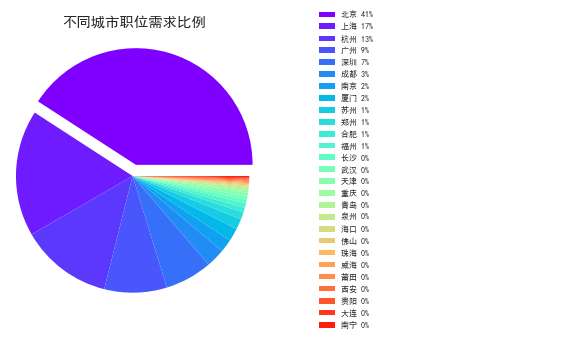

In [4]:
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

count_by_city=lagou_data_clean.groupby(['city'])['positionName','companyName'].count()
#求职位数量所占比例
count_by_city['positionName'] =count_by_city['positionName']/(count_by_city['positionName'].sum())
#自定义columns
count_by_city.columns=['percentage','positionNumber']

#按positionNumber进行排序
count_by_city.sort_values(by='positionNumber', ascending=False, inplace=True)

#添加辅助，列使城市比例以百分比形式展现，方便后续分析
count_by_city['label']=count_by_city.index+' '+((count_by_city['percentage']*100).round()).astype('int').astype('str')+'%'

#绘制饼图可视化各个城市所占比例
labels = count_by_city['label']
sizes = count_by_city['positionNumber']
explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)#设置距离中心的距离
fig,axes=plt.subplots(figsize=(10,5),ncols=2)
ax1,ax2=axes.ravel()
colors=cm.rainbow(np.arange(len(sizes))/len(sizes))
patches, texts = ax1.pie(sizes,labels=None, shadow=False,explode=explode,startangle=0, colors=colors)
ax1.axis('equal') 
ax1.set_title('不同城市职位需求比例',loc='center')
ax2.axis('off')
ax2.legend(patches,labels,loc='center left',fontsize=8)
plt.savefig('job_distribute.jpg')

本次爬取的拉勾网数据中，对数据分析师职业有需求的城市总共有27个，不过由于数据量有限，可能有些别的城市需求量较少的城市没有被爬取到。

从图中可以看出，** 一线城市北上深广及杭州这个新兴互联网和电子商务的聚集地需求量是最大，排名前五的城市分别为北京、上海，杭州、广州、深圳。**     

其中，**北京又以41%的占比稳居第一位**。为什么是北京呢？笔者认为，首先北京地域特殊---首都，其次是数据源选取问题，拉勾网是专注于互联网行业的招聘信息，而国内最早的一批互联网公司基本都在北京创立的，带动了大量互联网企业在北京生根发芽，同时也吸引了相应行业的人聚集，人的聚集又相应带动公司的聚集，两者相互影响使得北京成了互联网的主力军。

笔者自己来说，也准备过段时间从现在公司离职，北漂到北京闯闯，毕竟北京的机会相对来书还是很多的，不过机会总是留给有准备的人，目前来说还需要努力学习奋发向上呀。

另外，**二线城市杭州竟然赶超广深成为仅次于魔都---上海的数据分析师岗位第三大需求城市**，这一点笔者始料未及的。猜测可能杭州是国内最大的电商平台阿里巴巴的根据地，带动了整个互联网行业的快速发展，另外从今年双十一淘宝那巨额的销售量可以看出杭州电商及互联网行业势头一片大好。

总结来说，**如果想要找一份数据分析师的工作，北上广深及杭州相对于其他城市来说机会更大**。不过有失必有得嘛，在这种一线城市生活又不得不面对巨大的压力，生活幸福感指数来说可能会稍有降低，笔者目前在上海，可谓是深有体会。这几个城市相比较，杭州相对来说算是个比较宜居的城市。

### 整体薪酬情况

In [5]:
#查看不同水平薪酬分布
#由于拉勾网上的薪酬分布是个区间范围，并且多有重叠部分，不便于量化分析
#因此将此数据进行清理，取区间的均值作为薪酬值
def find_salary(word,method):
#定义一个函数，思路为先根据关键词K找出monthSalary字段的最低薪资和最高薪资   
    position=word.find('-')
    length=len(word)
    if position !=-1:
        bottomSalary=word[:position-1]
        topSalary=word[position+1:length-1]
    else:
        bottomSalary=word[:word.upper().find('K')]
        topSalary=bottomSalary
    if method=='bottom':
        return bottomSalary
    else:
        return topSalary

#求取平均薪资。根据自定义函数find_salary找出最低和最高薪资，然后求得平均薪资
lagou_data_clean['bottomSalary']=lagou_data_clean.monthSalary.apply(find_salary,method='bottom').astype('int')
lagou_data_clean['topSalary']=lagou_data_clean.monthSalary.apply(find_salary,method='top').astype('int')

#将最低薪资和最高薪资求取平均值得出平均薪资特征列。
lagou_data_clean['avgSalary']=lagou_data_clean.apply(lambda x:(x.topSalary+x.bottomSalary)/2,axis=1)

#print,可以看到avgSalary已经单独成一列
lagou_data_clean.head()

,saveTime,monthSalary,industry,developmentPhase,companySize,city,positionName,companyName,experience,education,full_or_part,positionLables,postionAdvantage,positionRequirement,bottomSalary,topSalary,avgSalary
0,2017-10-29 22:42:26,10k-15k,"电子商务,移动互联网",D轮及以上,2000人以上,北京,数据分析师,优信集团,经验1-3年,本科及以上,全职,数据分析\n ...,"全年14薪,五险一金",职位描述：\n \n 岗位职责： \n1. 负责业务数据的数据分...,10,15,12.5
1,2017-10-29 22:42:37,15k-25k,金融,上市公司,2000人以上,北京,数据分析师,京东金融,经验3-5年,本科及以上,全职,数据分析\n ...,免费用餐 免费班车 六险一金,职位描述：\n \n 岗位职责：\n1、梳理运营与推广的业务需求...,15,25,20.0
2,2017-10-29 22:42:50,6k-12k,其他,上市公司,2000人以上,南京,数据分析师,A.O.史密斯,经验1-3年,本科及以上,全职,数据分析\n ...,"五险一金,晋升空间",职位描述：\n \n 职责描述：1、根据算法设计的要求整理相应格...,6,12,9.0
3,2017-10-29 22:43:01,6k-8k,电子商务,不需要融资,150-500人,成都,数据分析,文轩在线,经验1-3年,本科及以上,全职,数据分析\n ...,"知名电商,数据分析",职位描述：\n \n 一、岗位描述：\n1、负责构建数据分析与数...,6,8,7.0
4,2017-10-29 22:43:11,15k-30k,"移动互联网,游戏",上市公司,50-150人,北京,数据分析研究员,360,经验1-3年,本科及以上,全职,算法\n 大数...,发展前景好,职位描述：\n \n 岗位职责：\n网络安全数据分析平台的使用者...,15,30,22.5


In [6]:
#describe函数可以很直观便捷的看出薪资的平均值，最小值，最大值及不同薪资级别所占的比例
lagou_data_clean.avgSalary.describe()

count    612.000000
mean      14.970588
std        7.147209
min        1.500000
25%        9.500000
50%       13.500000
75%       20.000000
max       45.000000
Name: avgSalary, dtype: float64

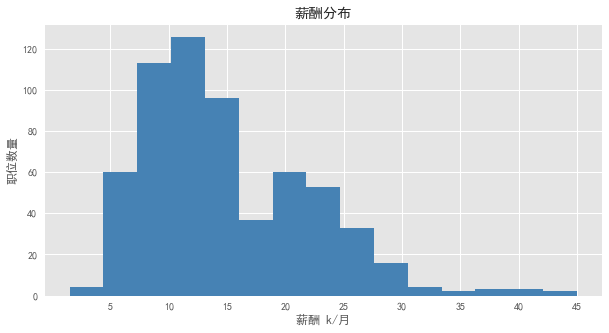

In [7]:
#绘图展示不同薪资水平的职位数量
lagou_data_clean['avgSalary'].hist(bins=15,facecolor='steelblue',alpha=1.0,figsize=(10,5)).get_figure()
plt.xlabel(u'薪酬 k/月')
plt.xticks(range(5,50,5))
plt.ylabel(u'职位数量')  
plt.title(u'薪酬分布')

可以看出，**本次爬取的数据分析师的薪酬分布从1.5K-45K,平均薪资约为15K**，薪酬范围跨度很大，最低薪资只有1.5K，在目前大数据欣欣向荣的形势下，笔者认为，1.5K的工作应该是属于实习生岗位，因为笔者在校实习时薪资就差不多这个水平。

从图中可以了解到，该岗位**薪资大部分集中于5K到25K之间**，不过也有少数人能拿到45K的高薪，也就应了一句话，你的能力决定你的薪资水平，能力越强，薪资自然就越高，只要技术过硬，就有机会获得高薪。数据分布呈双峰状，因为原始数据来源于拉勾网的爬取，薪资很容易集中在某个区间，跟真实薪资可能会有所出入，不过误差不大。

综合来看，数据分析师岗位整体薪资水平还是很让人心动的，给笔者增添了不少动力呀。

### 不同城市薪酬分布情况

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


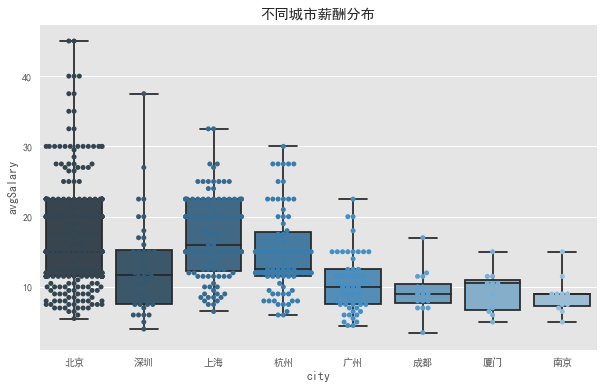

In [8]:
#很多城市的数据样本太小，其箱线图并无实际意义，着重关注岗位数量前八位的城市
main_city=['北京','上海','杭州','广州','深圳','成都','厦门','南京']
lagou_main_city=lagou_data_clean[lagou_data_clean['city'].isin(main_city)]
lagou_main_city.sort_values(by='avgSalary', ascending=False, inplace=True)

#绘制箱线图展示不同城市薪酬分布情况
ax4=plt.subplots(figsize=(10,6))
plt.title(u'不同城市薪酬分布')
ax4 = sns.boxplot(x="city", y="avgSalary", data=lagou_main_city,whis=np.inf,palette="Blues_d")#Blues_d
ax4= sns.swarmplot(x="city", y="avgSalary", data=lagou_main_city,palette="Blues_d")

这里主要截取了招聘数量前十的城市，观察可以看出薪资范围主要集中在5K到30K之间，和前面的整体薪酬范围是吻合的，**平均薪酬的前五名分别为上海、北京、杭州、深圳、厦门，上海以平均薪资约16K排在首位**，不愧被称之为魔都。

在高薪方面，北京总是能给人惊喜，前面分析到整体薪资最高为45K，而这个岗位就在北京，看来北京果然是各个行业大牛的聚集地啊，不过从图中也可以看出，北京有大量工作汇集在了6K到13K之间，说明想要高薪脱离这个群体还要继续努力啊。

总结来看，跟预想差不多，**果然想要拿到高薪，还是要到北上广深杭啊，想成为数据分析师，终究是逃离不了一线城市啊**。


### 工作经验需求情况 

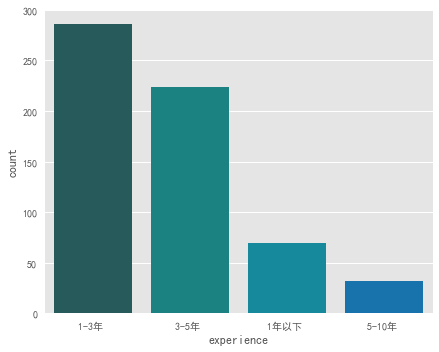

In [9]:
#处理数据，定义一个函数，去掉experience列无用的经验两字，使数据看起来清晰明了
def cut_word(word):
    return word[2:]
lagou_data_clean['experience']=lagou_data_clean['experience'].apply(cut_word)

#‘不限’和’应届毕业生‘的实际表示意义就是’1年以下‘，因此将这两个关键词替换为’1年以下‘
lagou_data_clean['experience']=lagou_data_clean['experience'].str.replace(u'不限',u'1年以下')
lagou_data_clean['experience']=lagou_data_clean['experience'].str.replace(u'应届毕业生',u'1年以下')

#将不同工作经验需求情况进行数据可视化
sns.factorplot(x="experience", data=lagou_data_clean,kind="count",palette="winter_d",size=5,aspect=1.2)


就经验来说，不出所料，**工作经验1-3年的需求量是最大的，其次是3-5年**，像笔者这种转行的工作经验为零的人需求量比较少，前路依旧艰难啊。

**工作经验5-10年的需求量是最少的**，像数据分析师行业3到5年技能就已经能熟练掌握了，目前来说，数据分析在国内的发展时间较短，属于一个新兴的职业，而且工作时间较长很多都转型领导岗了，所以需求量就相对来说比较少了。

总的来说，**数据分析师行业是一个偏年轻化的行业，有大量的工作机会集中在1-5年**，如果你是一个像笔者这样的‘小白’，不要气馁，也有不少的工作机会。

### 不同工作经验对薪酬影响 

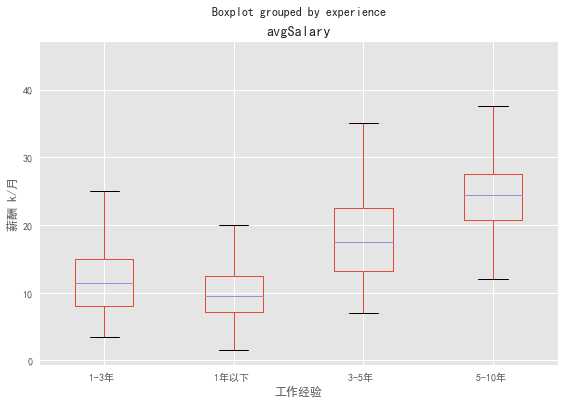

In [10]:
lagou_data_clean.boxplot(column='avgSalary',by='experience',figsize=(9,6))
plt.ylabel(u'薪酬 k/月')
plt.xlabel(u'工作经验')

毫无意外，**薪资随着工作经验的增加几乎是成倍的增长，工作三五年就差不多可以达到20K水平，并且短期内并不会随着年龄的增长而导致薪资下降**，如果能在这个行业坚持下来，未来的薪资待遇不会让人失望的。

### 不同学历需求情况 

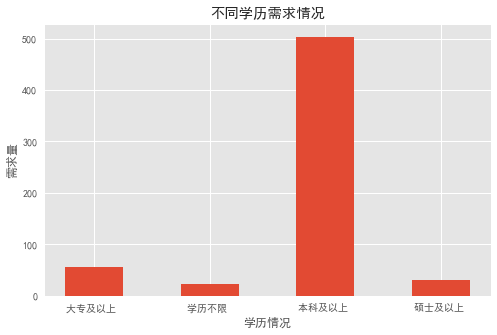

In [11]:
education_count = lagou_data_clean[['education','positionName']].groupby(['education'],as_index=False).count()
education_count.columns=['education','count']

fig = plt.figure(figsize = (8,5))
ax4 = plt.subplot(111)
rect = ax4.bar(np.arange(len(education_count)), education_count['count'], width = 0.5)
plt.xticks([0,1,2,3],education_count['education'])
plt.title(u'不同学历需求情况')
plt.xlabel("学历情况")  
plt.ylabel("需求量")  

目前来说，想要从事数据分析师这一职业，对应聘者的知识水平要求还是比较高的，**本科学历需求占了80%以上**，不过对硕士学历的要求就没有那么高了，占了5%左右，可能是因为数据分析岗位是一个比较追求工作熟练度的职位，能够经验的增长就能慢慢弥补技术的不足。

**大专学历要求占比10%左右，相对来说还是比较少的**，不过专科及以下的可以报个培训班增长一下技术弥补下学历的不足也能找个不错的工作。

总的来说，**本科学历算是个门槛，相对于其他类型的工作，数据分析对逻辑能力要求更高些，专科学历及以下在数据分析这块相对比较艰难**。

### 不同学历对薪资分布的影响 

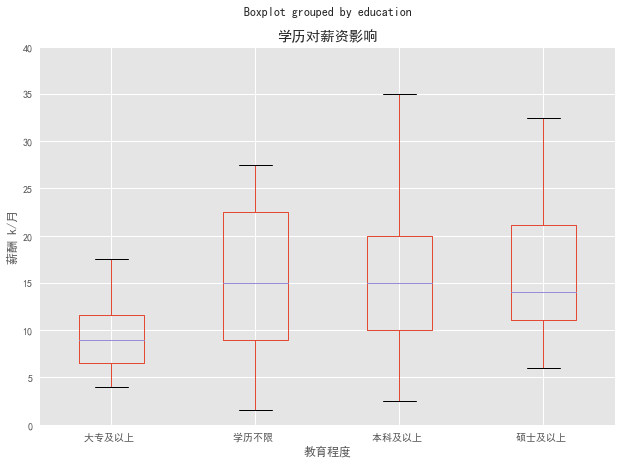

In [12]:
lagou_data_clean.boxplot(column='avgSalary',by='education',figsize=(10,7))
plt.ylabel(u'薪酬 k/月')
plt.ylim(0,40)
plt.xlabel(u'教育程度')
plt.title(u'学历对薪资影响') 

结合之前的分析可知，学历不限的样本太少，本次分析忽略掉学历不限后的的薪资排名为本科、硕士、大专及以上，这有点出乎意料，**本科生水平比硕士高2K左右**。这可能与 1.IT行业本身，本科生已足矣胜任，硕士学历优势不够明显，另外可能是因为样本有限，工作年限等水平不一致而造成分析误差。

**本科平均薪资15K，大专9K左右，薪资方面来看差异明显**，看来读本科还是有用的嘛。

总的来说，能够达到本科学历的薪资待遇还是相当可观的，而且笔者结合之前的分析猜测:**对于数据分析师行业，短期来说三年的研究生经历可能并没有三年行业经验来的有价值**。

### 岗位福利待遇关键词

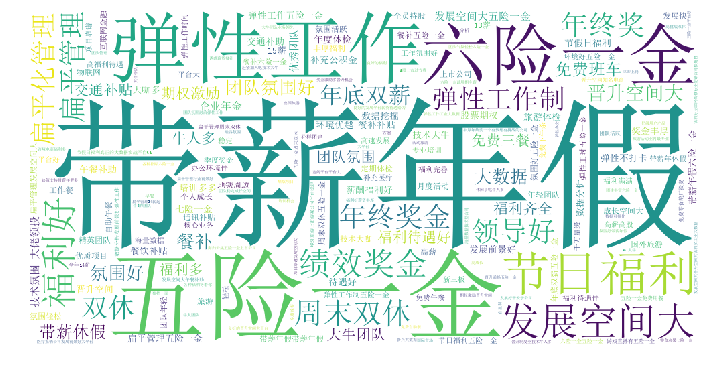

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
#创建一个文本，将关键词列表全部写入该文本
def advantage_text(word_list):
    f = open('advantage_text.txt','ab+')
    for word in word_list:
        f.write((word).encode('UTF-8'))
    f.close()
lagou_data_clean['postionAdvantage'].apply(advantage_text)

#指定默认字体
font_path='C:\\WINDOWS\\Fonts\\simsun.ttc'

#设置要分析的文本路径
d = path.dirname('.')
text_path = 'advantage_text.txt' 
text1 = open(path.join(d, text_path),'r', encoding='UTF-8').read()

# 设置词云属性
wc = WordCloud(font_path=font_path,width = 1000,height = 500,background_color = 'white',margin=2)

# 生成词云, 可以用generate输入全部文本
wc.generate(text1)
fig = plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

从有数据分析人才招聘需求的公司提供的福利来看，数据分析师岗位福利待遇还是相当不错的，**多数数据分析岗都有带薪年假、弹性工作、旅游体检、五险一金等基本保障，另外技术氛围、大牛团队、优质项目、发展空间大等能够满足大部分数据分析从业者工作环境需求**，笔者亦对未来的工作充满期待。

但从这些数据里可以看出，这些公司对于在一线城市中大家比较关心的解决户口、提供住房、租房补贴等没有提及。

### 职业技能关键词 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.118 seconds.
Prefix dict has been built succesfully.


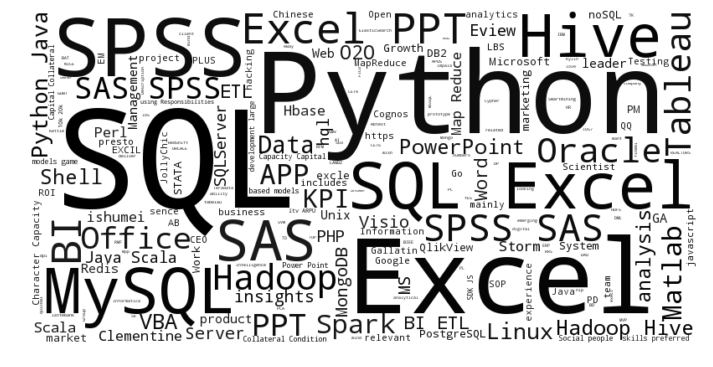

In [14]:
#接下来处理positionRequirement，首先抽取关键词
def keyWords(text):
        keyWords = jieba.analyse.extract_tags(text,withWeight=False,topK=20,allowPOS=())
        return keyWords
lagou_data_clean['keyWords']=lagou_data_clean['positionRequirement'].apply(keyWords)

#启用自定义字典
jieba.load_userdict('userdict.txt')

#创建一个文本，将关键词列表全部写入该文本
def write_to_text(word_list):
    f = open('word_text.txt','ab+')
    for word in word_list:
        f.write((word+u',').encode('UTF-8'))
    f.close()
lagou_data_clean['keyWords'].apply(write_to_text)
d = path.dirname('.')
keyword_text =open('word_text.txt',errors='ignore').read()
#仅显示文本中的英文词频
english_only = ''.join(x for x in keyword_text if ord(x) < 256)

#通过wordcloud提供的接口，读入文本文件后自动根据词频绘制词云
wcd = WordCloud(width = 800,height = 400,background_color = 'white',margin=2).generate(english_only) 

#自定义词云字体颜色为黑色
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(0, 10)    
fig = plt.figure(figsize=(12,8))
plt.imshow(wcd.recolor(color_func=grey_color_func, random_state=30),interpolation='bilinear')
plt.axis("off")
plt.show()

对于数据分析岗位，企业需求频率最高的分别为结构化查询语言SQL、表格神器Excel和非常时髦的Python编程语言。看来，**想要找到一份不错的数据分析师岗位，SQL、Excel和Python是必备技能**。

从词云上看，企业对于数据分析岗技能需求频率排在前列的分别有：**SQL，Excel，Python，Hive，SPSS，SAS，Mysql，Hadoop，Tableau，BI，Oracle**等。

## 六、分析结论 

通过以上的分析，我们可以得出以下结论：

1. 对于数据分析师这一岗位，有大量的工作机会集中在北上广深以及杭州。
2. 数据分析师岗位平均薪资约为15K，大部分薪资集中于5K到25K之间，不过也有少部分获得更高的薪资，令人充满期待。
3. 平均薪资来看，上海以平均薪资16K排在首位，其次分别为北京、杭州。从高薪方面来看，北京高薪岗位相对较多，发展上限也更高。
4. 企业对工作经验需求大多数集中在1-5年，对于1年以下工作经验的‘小白’需求量较少。
5. 薪资随着工作经验的增加几乎是成倍的增长，工作三五年就差不多可以达到20K水平，并且短期内并不会随着年龄的增长而导致薪资下降。
6. 本科学历对于数据分析这一岗位算是个门槛，专科学历及以下需求量极少，找到合适的工作会相对比较艰难。
7. 本科平均薪资为15K左右，大专9K左右，薪资方面差异明显。并且仅从薪资来看，短期来说三年的研究生经历可能并没有三年行业经验来的有价值。
8. 多数数据分析岗都有带薪年假、旅游体检、五险一金等基本保障，另外技术氛围、大牛团队、优质项目、弹性工作等能够满足大部分数据分析从业者工作环境需求。
9. 数据分析岗技能需求频率排在前列的有：SQL，Excel，Python，Hive，SPSS，SAS，Mysql，Hadoop，Tableau，BI，Oracle，其中SQL、Excel和Python可以说是必备技能。


## 七、结束语 

    通过本次拉勾网分析项目，不仅提高了自身对于数据处理与分析的能力，同时得出的结论对像笔者这样的转行‘小白’也是一个很好的参考，了解了岗位技能需求，才能够更有方向地提升自己。另外，数据分析师所需要具备的素质远不止这些，还需要有扎实的数学、统计学基础，良好的数据敏感度，严谨的逻辑思维能力等。
    本次分析过程中消耗了大量的时间和精力，走了很多弯路，希望下次分析过程中能够完善此次代码中不合理的地方。